In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
#from LQN_igraph import *
import itertools
from copy import deepcopy
import sympy as sp
from itertools import groupby
import igraph as ig
import hashlib
import pickle
import igraph as ig # .pkl 파일에 igraph 객체가 포함되어 있으므로 로드 시 필요합니다.
import os
from typing import Dict, List, Any # 타입 힌트를 위해 추가 (선택 사항)

In [15]:
from visualization import *

In [2]:
from quantum_state_analysis import *

In [3]:
# --- 설정 ---
# 결과 파일이 저장된 디렉토리 경로
# main_script.py 실행 시 --output_dir 옵션을 사용했다면 해당 경로를, 아니면 기본값 'results'를 사용합니다.
output_dir = '/Users/jaeheekim/Desktop/SKKU_PHDS/code/canonical_graph/'

# 로드할 파일의 파라미터 설정 (main_script.py 실행 시 사용했던 값)
num_system = 4
num_ancilla = 2
graph_type = 0

# 로드할 파일 경로 조합
filename = f'bigraph_result_sys{num_system}_anc{num_ancilla}_type{graph_type}.pkl'
file_path = os.path.join(output_dir, filename)

# --- 파일 로드 ---
loaded_data: Dict[str, List[Any]] = {} # 로드된 데이터를 저장할 변수

print(f"'{file_path}' 파일 로드를 시도합니다...")

try:
    # 파일을 바이너리 읽기 모드('rb')로 엽니다.
    with open(file_path, 'rb') as f:
        # pickle.load() 함수를 사용하여 파일에서 데이터를 로드(역직렬화)합니다.
        loaded_data = pickle.load(f)

    print("파일 로드 완료!")

    # --- 로드된 데이터 확인 (선택 사항) ---
    if loaded_data:
        print(f"로드된 데이터 타입: {type(loaded_data)}")
        num_keys = len(loaded_data)
        print(f"데이터에 포함된 고유 구조 해시 키 개수: {num_keys}")

        # 첫 번째 키와 해당 키에 포함된 고유 그래프 개수 확인
        first_key = list(loaded_data.keys())[0]
        num_graphs_in_first_group = len(loaded_data[first_key])
        print(f"첫 번째 그룹(키: '{first_key[:10]}...')에 포함된 고유 그래프 개수: {num_graphs_in_first_group}")

        # 첫 번째 그래프 정보 확인 (igraph 객체)
        if num_graphs_in_first_group > 0:
            first_graph = loaded_data[first_key][0]
            print(f"첫 번째 그룹의 첫 번째 그래프 타입: {type(first_graph)}")
            if isinstance(first_graph, ig.Graph):
                print(f"그래프 요약: {first_graph.summary()}")

    else:
        print("로드된 데이터가 비어 있습니다.")

except FileNotFoundError:
    print(f"오류: 파일을 찾을 수 없습니다. 경로를 확인하세요: '{file_path}'")
except pickle.UnpicklingError:
    print(f"오류: 파일을 로드하는 중 pickle 오류가 발생했습니다. 파일이 손상되었거나 호환되지 않을 수 있습니다.")
except ImportError as e:
    print(f"오류: 데이터를 로드하는 데 필요한 클래스/모듈을 찾을 수 없습니다: {e}")
    print("특히 'igraph' 라이브러리가 현재 환경에 설치되어 있는지 확인하세요.")
except Exception as e:
    print(f"알 수 없는 오류 발생: {e}")



'/Users/jaeheekim/Desktop/SKKU_PHDS/code/canonical_graph/bigraph_result_sys4_anc2_type0.pkl' 파일 로드를 시도합니다...
파일 로드 완료!
로드된 데이터 타입: <class 'dict'>
데이터에 포함된 고유 구조 해시 키 개수: 575
첫 번째 그룹(키: 'f3efd1bb4e...')에 포함된 고유 그래프 개수: 5
첫 번째 그룹의 첫 번째 그래프 타입: <class 'igraph.Graph'>
그래프 요약: IGRAPH UNW- 12 15 -- 
+ attr: bipartite (v), category (v), name (v), weight (e)


In [4]:
total_elements = sum(len(v) for v in loaded_data.values())  # 모든 리스트 요소 개수 합산
print(total_elements)  # 출력: 9

8876


In [5]:
# graph_dict contains your dictionary of igraph objects
result_dict = process_graph_dict(loaded_data)

# # Accessing results
# for hash_key, states in result_dict.items():
#     print(f"Hash: {hash_key}")
#     for state in states:
#         counter, matchings, graph, index = state
#         print(f"  State coefficients: {dict(counter)}")

Processing 575 graph groups for quantum states...
Perfect matching analysis complete. Processed: 5, Valid (met conditions): 5, Errors: 0
Removed 0 duplicate states based on Counter content. Kept 5 unique entries.
Perfect matching analysis complete. Processed: 5, Valid (met conditions): 5, Errors: 0
Removed 0 duplicate states based on Counter content. Kept 5 unique entries.
Perfect matching analysis complete. Processed: 28, Valid (met conditions): 28, Errors: 0
Removed 8 duplicate states based on Counter content. Kept 20 unique entries.
Perfect matching analysis complete. Processed: 28, Valid (met conditions): 28, Errors: 0
Removed 8 duplicate states based on Counter content. Kept 20 unique entries.
Perfect matching analysis complete. Processed: 36, Valid (met conditions): 36, Errors: 0
Removed 8 duplicate states based on Counter content. Kept 28 unique entries.
Perfect matching analysis complete. Processed: 36, Valid (met conditions): 36, Errors: 0
Removed 8 duplicate states based on C

In [6]:
#result_dict

In [7]:
# 예제 2: 여러 상태 검색 (특정 비트 위치만 플립)
target_states = ['0000', '1100', '0011', '1111'] 
results = check_quantum_states_with_bit_flips(result_dict, target_states, bit_flip_positions=None, exact_num_states=4)

In [10]:
results

[('4a83a72b0f9f97e411b68ebe6169cb917cf71862abfee133499a779c47c82181',
  2,
  Counter({'0101': 1, '0110': 1, '1001': 1, '1010': 1}),
  [0, 2],
  {'1010': 1, '0110': 1, '1001': 1, '0101': 1}),
 ('4a83a72b0f9f97e411b68ebe6169cb917cf71862abfee133499a779c47c82181',
  3,
  Counter({'0100': 1, '0111': 1, '1000': 1, '1011': 1}),
  [0],
  {'1000': 1, '0100': 1, '1011': 1, '0111': 1}),
 ('4a83a72b0f9f97e411b68ebe6169cb917cf71862abfee133499a779c47c82181',
  9,
  Counter({'0000': 1, '0011': 1, '1100': 1, '1111': 1}),
  [],
  {'0000': 1, '1100': 1, '0011': 1, '1111': 1}),
 ('4a83a72b0f9f97e411b68ebe6169cb917cf71862abfee133499a779c47c82181',
  10,
  Counter({'0001': 1, '0010': 1, '1101': 1, '1110': 1}),
  [2],
  {'0010': 1, '1110': 1, '0001': 1, '1101': 1}),
 ('3065adda478c76fb3b42d853230a914ed1340b29bdfc6fa184088abd3e9716d3',
  0,
  Counter({'0101': 2, '0110': 1, '1001': 1, '1010': 1}),
  [0, 2],
  {'1010': 1, '0110': 1, '1001': 1, '0101': 2}),
 ('3065adda478c76fb3b42d853230a914ed1340b29bdfc6fa1840

In [12]:
len(results)

29

Attempting to draw bipartite graph: IGRAPH UNW- 12 14 -- 
+ attr: bipartite (v), category (v), name (v), weight (e)


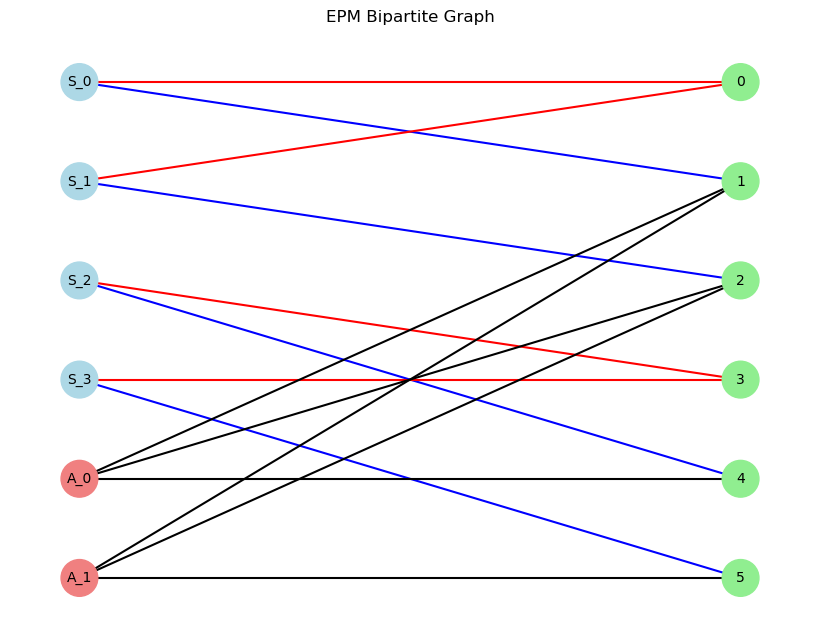

In [16]:
Draw_EPM_bipartite_graph(results[0][1])